### Imbalanced classes

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived'>

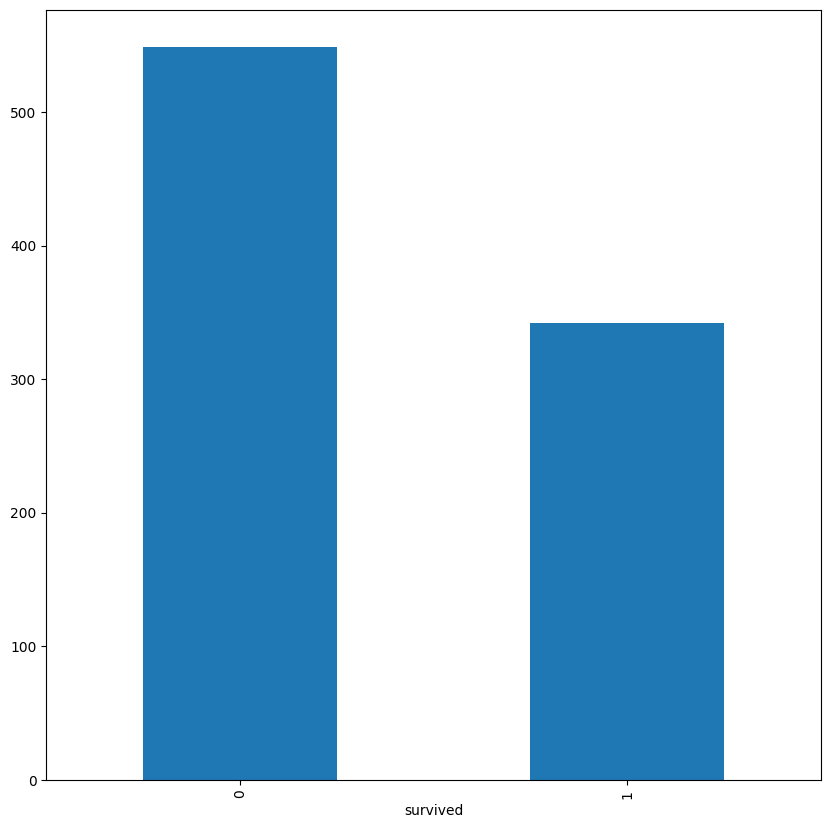

In [3]:
titanic.value_counts("survived").plot(kind="bar", figsize=(10,10))

In [4]:
titanic.value_counts("survived")

survived
0    549
1    342
Name: count, dtype: int64

### Methods for resampling

1. Upsampling
2. Downsampling

#### Upsampling

In [5]:
from sklearn.utils import resample

In [6]:
mask = titanic["survived"] == 1

In [7]:
mask

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: survived, Length: 891, dtype: bool

In [8]:
survived_df = titanic[mask]
survived_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [9]:
survived_df['survived'].value_counts()

survived
1    342
Name: count, dtype: int64

In [10]:
death_df = titanic[~mask]

In [11]:
death_df['survived'].value_counts()

survived
0    549
Name: count, dtype: int64

In [12]:
df_upsample = resample(survived_df, replace=True, n_samples=len(death_df), random_state=42)

In [13]:
df_upsample.survived.value_counts()

survived
1    549
Name: count, dtype: int64

In [14]:
titanic_2 = pd.concat([death_df, df_upsample])
titanic_2.survived.value_counts()

survived
0    549
1    549
Name: count, dtype: int64

In [15]:
# !pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 589.4 kB/s eta 0:00:001m571.7 kB/s eta 0:00:01


### Over Sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=42)

In [20]:
titanic_3 = titanic.dropna()
X = titanic_3.dropna().drop('survived', axis=1)
y = titanic_3['survived']

In [22]:
X_ros, y_ros = ros.fit_resample(X, y)

In [23]:
y.value_counts() # imbalanced

survived
1    123
0     59
Name: count, dtype: int64

In [24]:
pd.Series(y_ros).value_counts() # balanced

survived
1    123
0    123
Name: count, dtype: int64

#### DownSampling the majority

In [25]:
# survived_df, death_df
df_downsample = resample(death_df, replace=False, n_samples=len(survived_df), random_state=42)

In [26]:
titanic_4 = pd.concat([survived_df, df_downsample])
titanic_4.survived.value_counts()

survived
1    342
0    342
Name: count, dtype: int64